In [1]:
import numpy as np

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
sns.set()

In [3]:
from sklearn.linear_model import LinearRegression

### Loading the Data


In [4]:
data = pd.read_csv('CarSales.csv')
data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


### Cleaning the Data

In [5]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [6]:
data = data.dropna(axis=0)
data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520


In [7]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


C:\Users\damod\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

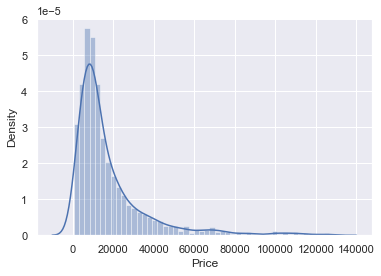

In [8]:
q = data['Price'].quantile(0.99)
data_new = data[data['Price'] < q]
sns.distplot(data_new['Price'])

In [9]:
data_new.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000,3984
unique,7,NaN,6,NaN,NaN,4,2,NaN,302
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN,188
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922,NaN
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000,NaN
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000,NaN


### Visualizing.


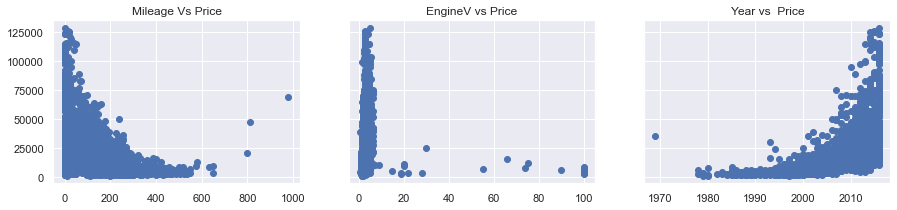

In [10]:
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data_new['Mileage'],data_new['Price'])
ax1.set_title('Mileage Vs Price')
ax2.scatter(data_new['EngineV'],data_new['Price'])
ax2.set_title('EngineV vs Price')
ax3.scatter(data_new['Year'],data_new['Price'])
ax3.set_title('Year vs  Price')
plt.show()

#### Removing the outliers in Mileage and EngineV

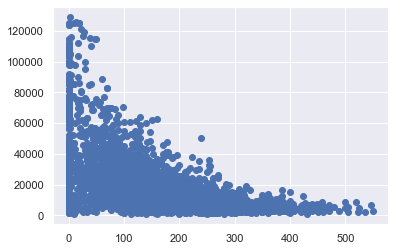

In [22]:
q = data_new['Mileage'].quantile(0.998)
q
data_new = data_new[data_new['Mileage'] < q]
plt.scatter(data_new['Mileage'], data_new['Price'])


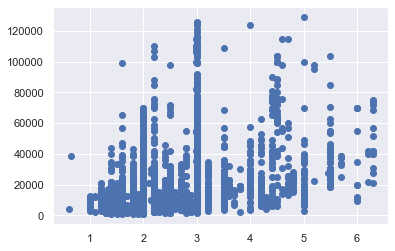

In [23]:
# changing the Engine Volumes'
data_new = data_new[data_new['EngineV'] < 6.5]
plt.scatter(data_new['EngineV'],data_new['Price'])


C:\Users\damod\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

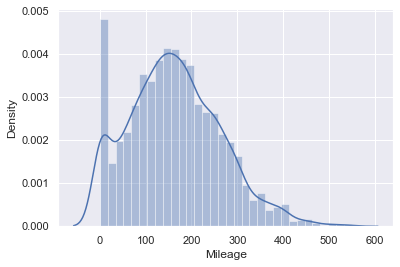

In [24]:
sns.distplot(data_new['Mileage'])

C:\Users\damod\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

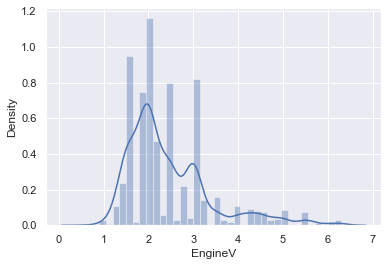

In [25]:
sns.distplot(data_new['EngineV'])

C:\Users\damod\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

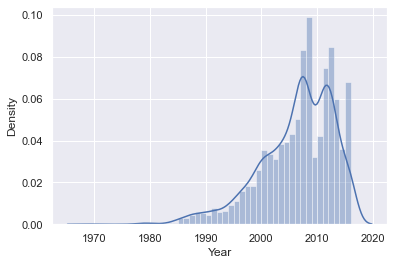

In [27]:
sns.distplot(data_new['Year'])

In [28]:
data_new = data_new[data_new['Year'] > 1985]

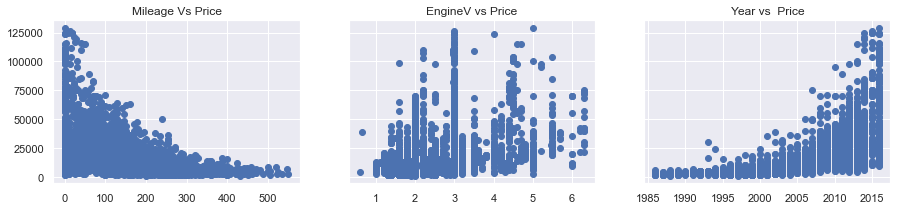

In [29]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15, 3))
ax1.scatter(data_new['Mileage'], data_new['Price'])
ax1.set_title('Mileage Vs Price')
ax2.scatter(data_new['EngineV'], data_new['Price'])
ax2.set_title('EngineV vs Price')
ax3.scatter(data_new['Year'], data_new['Price'])
ax3.set_title('Year vs  Price')
plt.show()


#### The Relations are Exponential.
Apply the log Transformations.

In [30]:
data_cleaned = data_new.copy()
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3926,3926.000000,3926,3926.000000,3926.000000,3926,3926,3926.000000,3926
unique,7,NaN,6,NaN,NaN,4,2,NaN,298
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,867,NaN,1498,NaN,NaN,1833,3561,NaN,184
mean,NaN,17976.320863,NaN,163.570046,2.444944,NaN,NaN,2006.473765,NaN
std,NaN,19025.619598,NaN,99.466695,0.946217,NaN,NaN,6.386427,NaN
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1986.000000,NaN
25%,NaN,7000.000000,NaN,92.250000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,159.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21500.000000,NaN,230.000000,3.000000,NaN,NaN,2011.750000,NaN


In [32]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['LogPrice'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,LogPrice
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,9.814656
...,...,...,...,...,...,...,...,...,...,...
4338,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,T5 (Transporter),9.350102
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla,9.792556
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350,11.736069
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535,8.779557


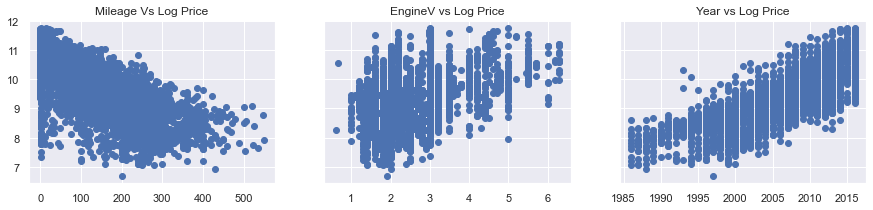

In [34]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15, 3))
ax1.scatter(data_new['Mileage'], data_cleaned['LogPrice'])
ax1.set_title('Mileage Vs Log Price')
ax2.scatter(data_new['EngineV'], data_cleaned['LogPrice'])
ax2.set_title('EngineV vs Log Price')
ax3.scatter(data_new['Year'], data_cleaned['LogPrice'])
ax3.set_title('Year vs Log Price')
plt.show()


Chceking the Multicollinearity

In [35]:
data_cleaned = data_cleaned.drop(['Price'],axis=1)
data_cleaned

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,LogPrice
0,BMW,sedan,277,2.0,Petrol,yes,1991,320,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,Sprinter 212,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,S 500,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,Q7,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,Rav 4,9.814656
...,...,...,...,...,...,...,...,...,...
4338,Volkswagen,van,163,2.5,Diesel,yes,2008,T5 (Transporter),9.350102
4339,Toyota,sedan,35,1.6,Petrol,yes,2014,Corolla,9.792556
4340,Mercedes-Benz,sedan,9,3.0,Diesel,yes,2014,S 350,11.736069
4341,BMW,sedan,1,3.5,Petrol,yes,1999,535,8.779557


In [40]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Model', 'LogPrice'], dtype=object)

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns
vif

,VIF,Features
0,3.677620,Mileage
1,10.327887,Year
2,7.677713,EngineV


The Year feature have VIF > 10 , so drop it.


In [42]:
data_cleaned = data_cleaned.drop(['Year'],axis=1)
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Model', 'LogPrice'], dtype=object)

In [46]:
data_cleaned = data_cleaned.drop(['Model'],axis=1)
data_cleaned

,Brand,Body,Mileage,EngineV,Engine Type,Registration,LogPrice
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656
...,...,...,...,...,...,...,...
4338,Volkswagen,van,163,2.5,Diesel,yes,9.350102
4339,Toyota,sedan,35,1.6,Petrol,yes,9.792556
4340,Mercedes-Benz,sedan,9,3.0,Diesel,yes,11.736069
4341,BMW,sedan,1,3.5,Petrol,yes,8.779557


#### Creating the dummy variables for the Categorial Data ['Brand']

In [48]:
data_with_dummies = pd.get_dummies(data_cleaned,drop_first=True)
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'LogPrice', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [51]:
data_preprocessed = data_with_dummies[list(data_with_dummies.columns.values)]
data_preprocessed

,Mileage,EngineV,LogPrice,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4338,163,2.5,9.350102,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
4339,35,1.6,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
4340,9,3.0,11.736069,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
4341,1,3.5,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [54]:
final_data = data_preprocessed.reset_index(drop=True)

#### Regression

In [55]:
target = final_data['LogPrice']
inputs = final_data.drop(['LogPrice'],axis=1)

Scaling the Data.

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)
inputs_scaled = scaler.transform(inputs)
inputs_scaled

array([[ 1.14052651, -0.47029428,  2.28946575, ..., -0.16332067,
         1.3358133 ,  0.32015512],
       [ 2.64876106,  0.48098248, -0.43678312, ..., -0.16332067,
        -0.74860761,  0.32015512],
       [ 1.95497317,  2.70062823, -0.43678312, ..., -0.16332067,
        -0.74860761,  0.32015512],
       ...,
       [-1.55418589,  0.58667989, -0.43678312, ..., -0.16332067,
        -0.74860761,  0.32015512],
       [-1.63462507,  1.11516698,  2.28946575, ..., -0.16332067,
         1.3358133 ,  0.32015512],
       [-0.39787274, -0.47029428, -0.43678312, ..., -0.16332067,
        -0.74860761,  0.32015512]])

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled,target,test_size=0.2,random_state=333)


In [61]:
x_train.shape,x_test.shape

((3140, 17), (786, 17))

Creating the regression

In [62]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

This is a log linear regression -> LogPrice

In [63]:
yhat = reg.predict(x_test)


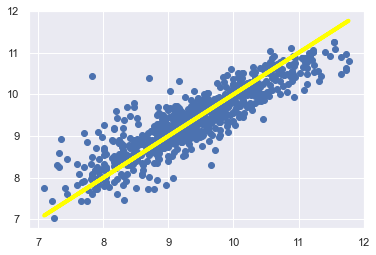

In [65]:
plt.scatter(y_test,yhat)
plt.plot(y_test,y_test,lw=4,c='yellow')
plt.show()

C:\Users\damod\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LogPrice', ylabel='Density'>

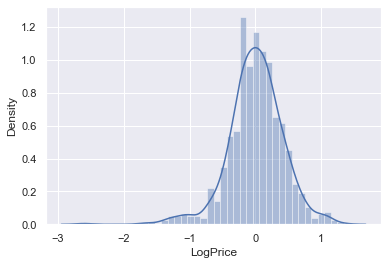

In [68]:
sns.distplot(y_test - yhat)

Summary of the Regression

In [70]:
summary = pd.DataFrame(data=list(inputs.columns.values),columns=['Features'])
summary['Weights'] = reg.coef_
summary

,Features,Weights
0,Mileage,-0.464069
1,EngineV,0.214291
2,Brand_BMW,0.011752
3,Brand_Mercedes-Benz,0.005406
4,Brand_Mitsubishi,-0.136897
5,Brand_Renault,-0.187253
6,Brand_Toyota,-0.054222
7,Brand_Volkswagen,-0.092182
8,Body_hatch,-0.150385
9,Body_other,-0.095894


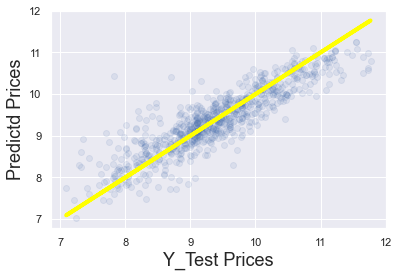

In [76]:
plt.scatter(y_test, yhat , alpha=0.1)
plt.plot(y_test, y_test, lw=4, c='yellow')
plt.xlabel("Y_Test Prices",size=18)
plt.ylabel("Predictd Prices",size=18)
plt.show()


In [78]:
df = pd.DataFrame()
df['Predicted'] = np.exp(yhat)
y_test = y_test.reset_index(drop=True)
df['Target'] = np.exp(y_test)
df

,Predicted,Target
0,4115.496115,2000.0
1,15163.772290,14700.0
2,37777.062060,54500.0
3,2690.394070,3099.0
4,14160.218647,22000.0
...,...,...
781,9530.857178,9400.0
782,5982.523147,6500.0
783,12165.229500,17000.0
784,3992.238484,5500.0


In [79]:
df['Error/Residual'] =  df['Predicted'] - df['Target']
df

,Predicted,Target,Error/Residual
0,4115.496115,2000.0,2115.496115
1,15163.772290,14700.0,463.772290
2,37777.062060,54500.0,-16722.937940
3,2690.394070,3099.0,-408.605930
4,14160.218647,22000.0,-7839.781353
...,...,...,...
781,9530.857178,9400.0,130.857178
782,5982.523147,6500.0,-517.476853
783,12165.229500,17000.0,-4834.770500
784,3992.238484,5500.0,-1507.761516


In [82]:
df['Difference'] = np.abs((df['Error/Residual'] / df['Target']) * 100)
df

,Predicted,Target,Error/Residual,Difference
0,4115.496115,2000.0,2115.496115,105.774806
1,15163.772290,14700.0,463.772290,3.154914
2,37777.062060,54500.0,-16722.937940,30.684290
3,2690.394070,3099.0,-408.605930,13.185090
4,14160.218647,22000.0,-7839.781353,35.635370
...,...,...,...,...
781,9530.857178,9400.0,130.857178,1.392098
782,5982.523147,6500.0,-517.476853,7.961182
783,12165.229500,17000.0,-4834.770500,28.439826
784,3992.238484,5500.0,-1507.761516,27.413846


In [83]:
df.describe(include='all')

,Predicted,Target,Error/Residual,Difference
count,786.000000,786.000000,786.000000,786.000000
mean,15833.105752,17844.748295,-2011.642543,35.014670
std,12885.276358,19005.028976,10348.452972,61.545846
min,1119.194943,1199.000000,-85233.298863,0.080033
25%,7322.629366,6900.000000,-3320.199327,11.367977
50%,11459.745600,11300.000000,-35.254113,23.189665
75%,19800.086903,21450.000000,2135.317886,40.345564
max,76708.384498,129222.000000,31767.512017,1270.700481
